# Support Notebook - ConGen and Primed Sampling Demo

In [1]:
from utils.plots import plot_stroke
import numpy as np
from matplotlib import pyplot as plt

### Plots the dataset stokes to consult later when choosing a style reference index for the primed sampling code

In [2]:
strokes = np.load('./data/strokes.npy', allow_pickle=True, encoding='latin1')

Dataset reference index: 0


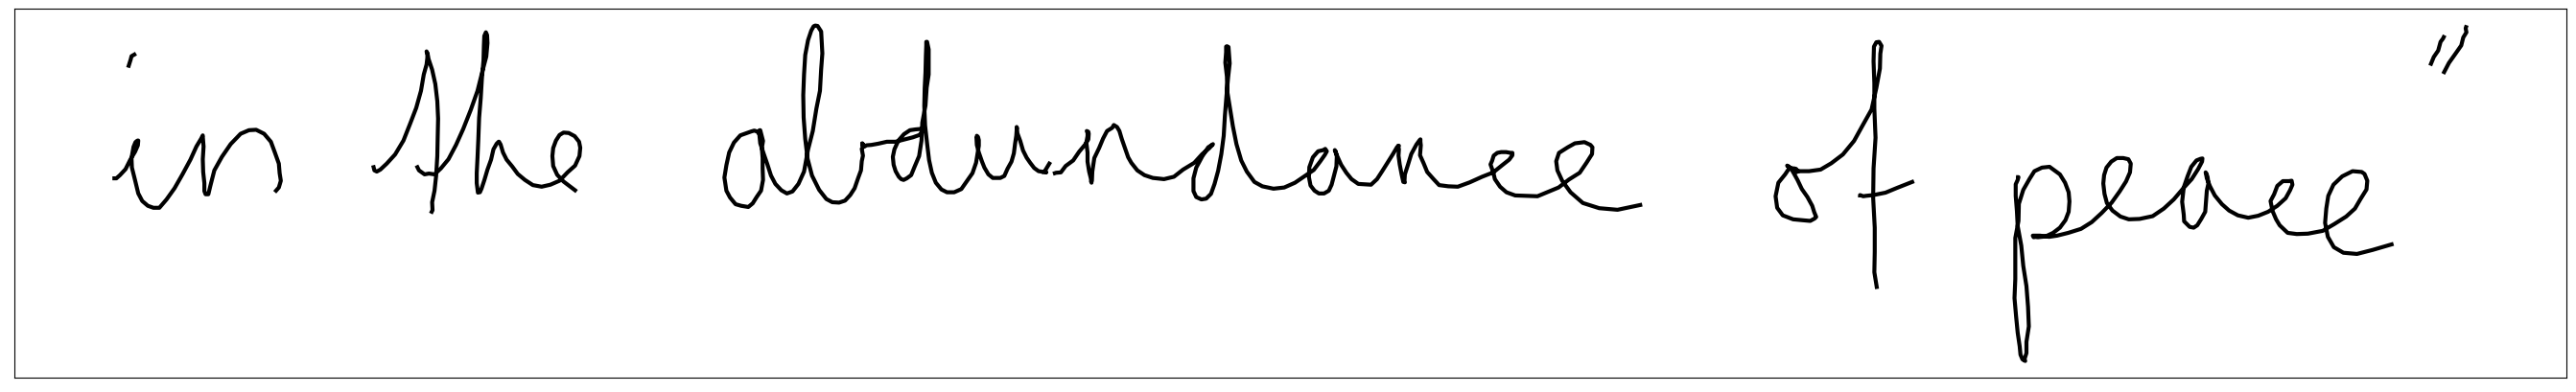

Dataset reference index: 1


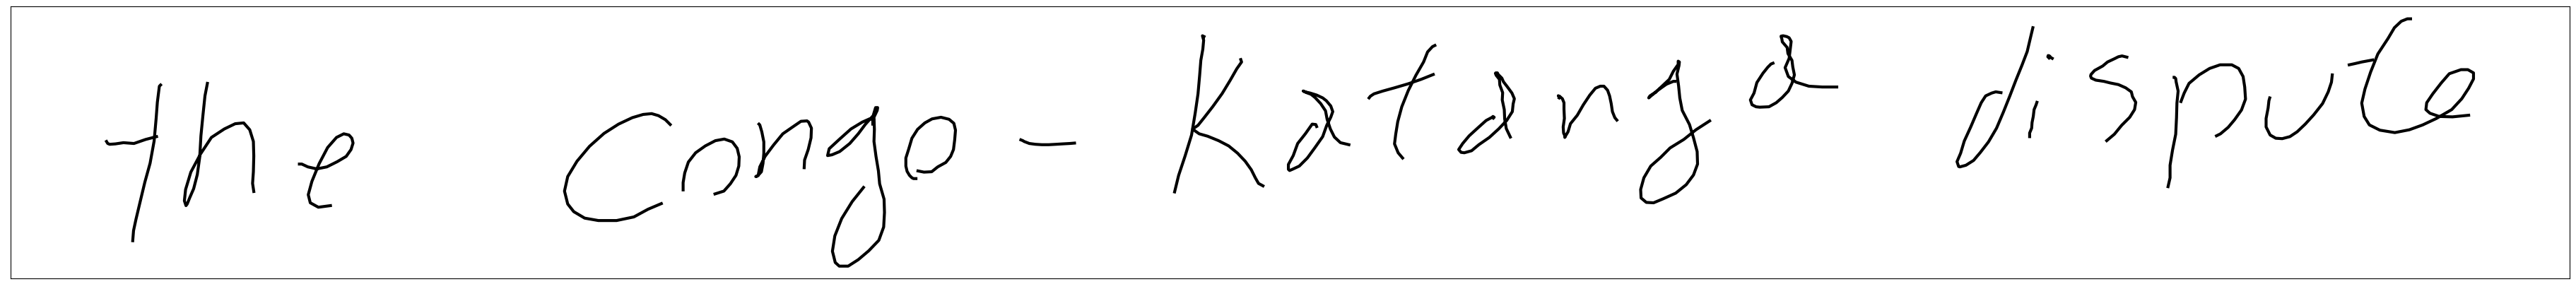

Dataset reference index: 2


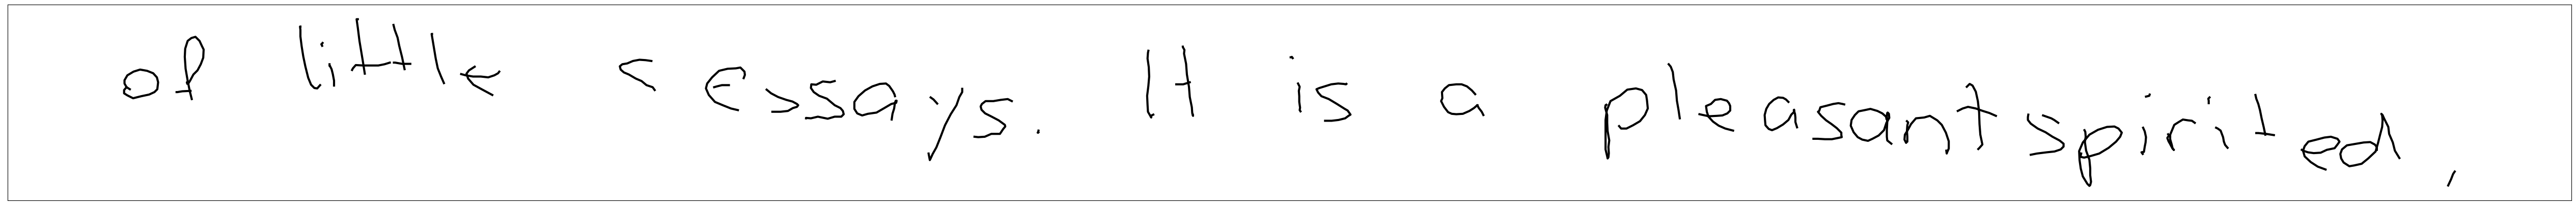

Dataset reference index: 3


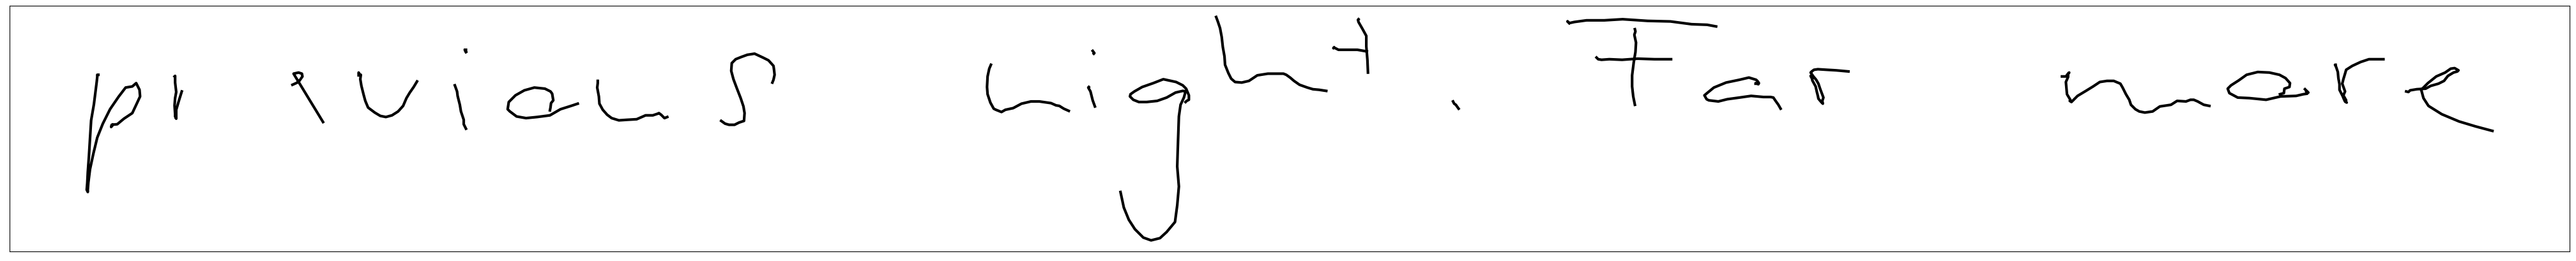

Dataset reference index: 4


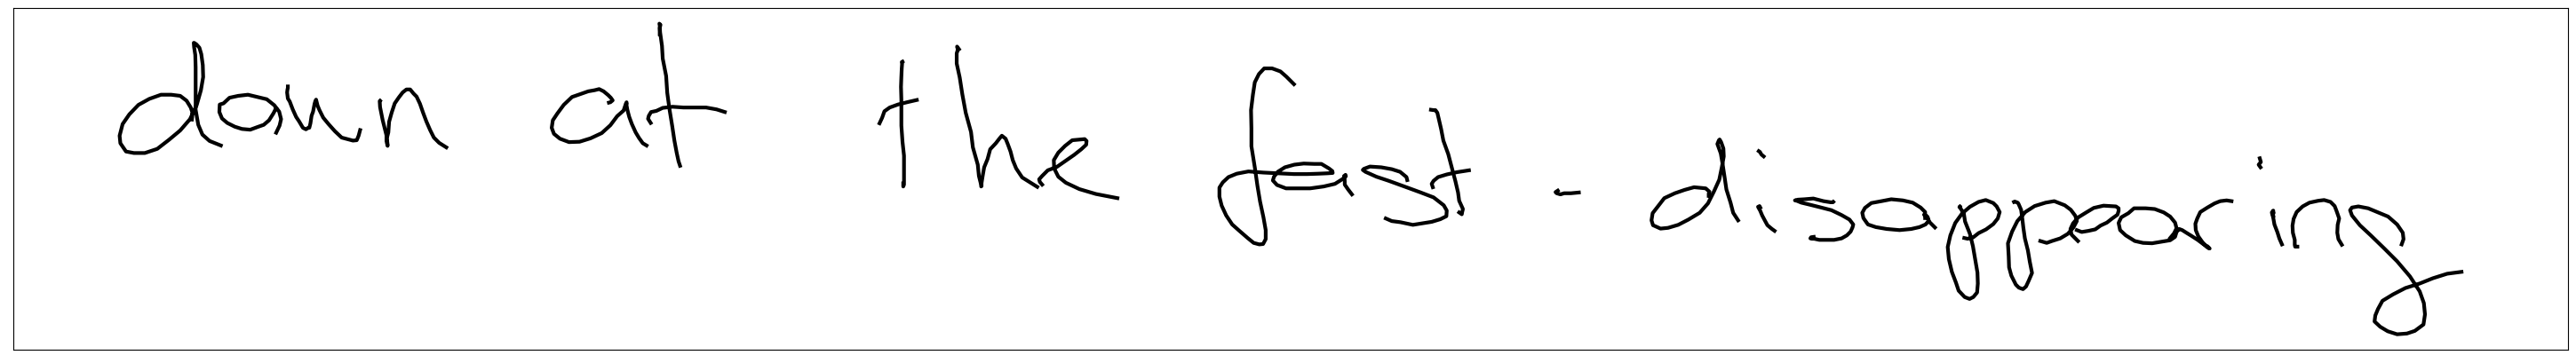

Dataset reference index: 5


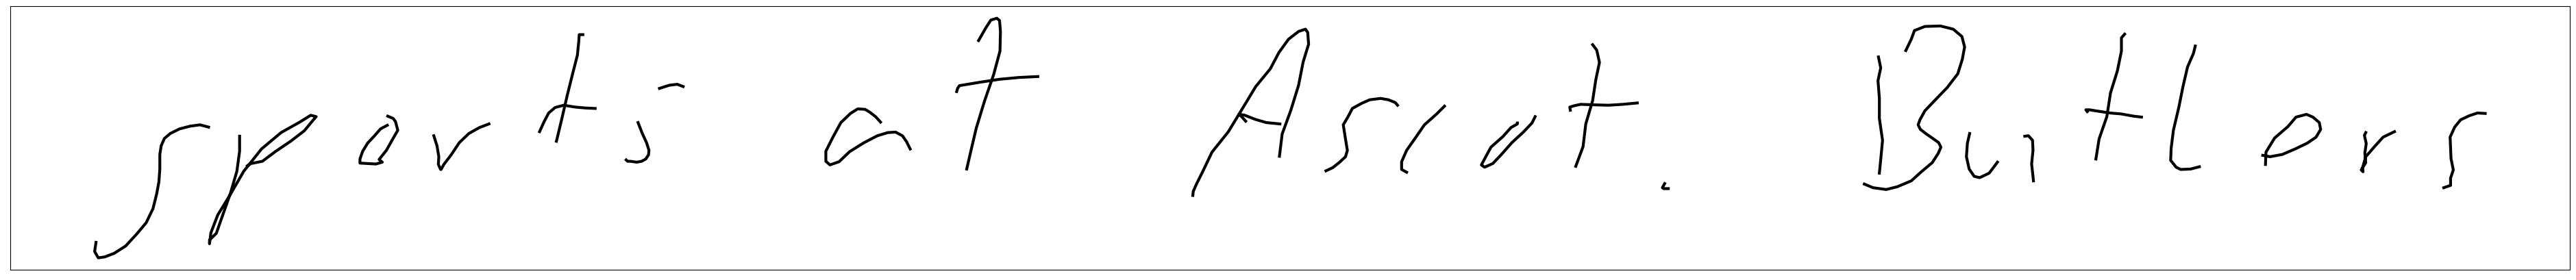

Dataset reference index: 6


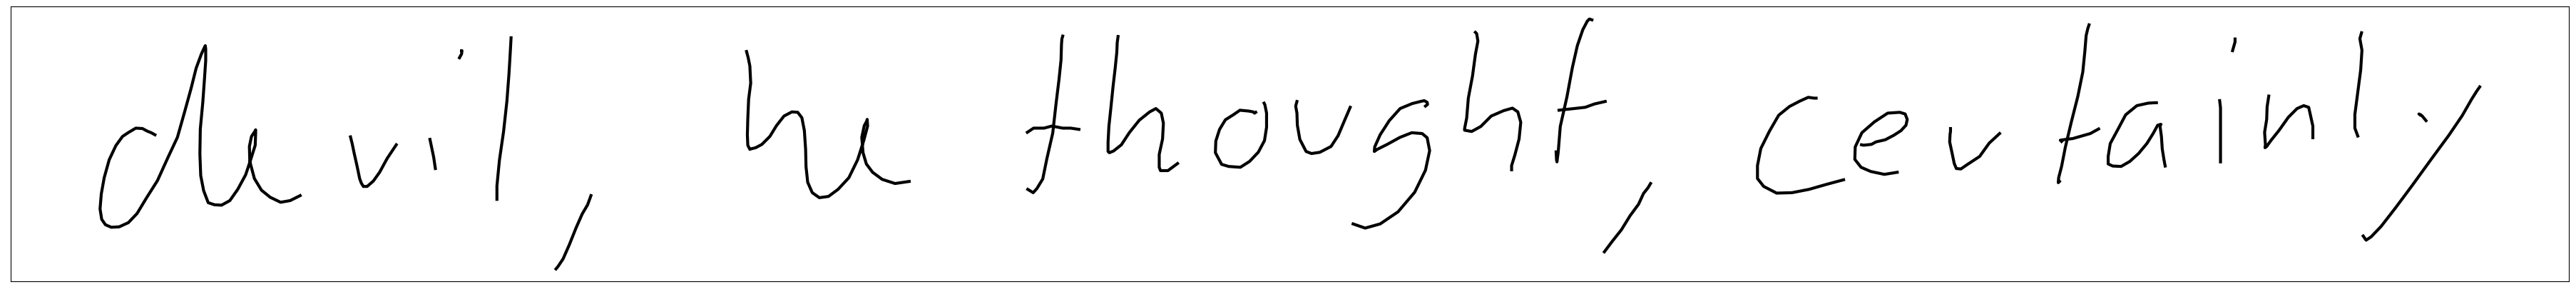

Dataset reference index: 7


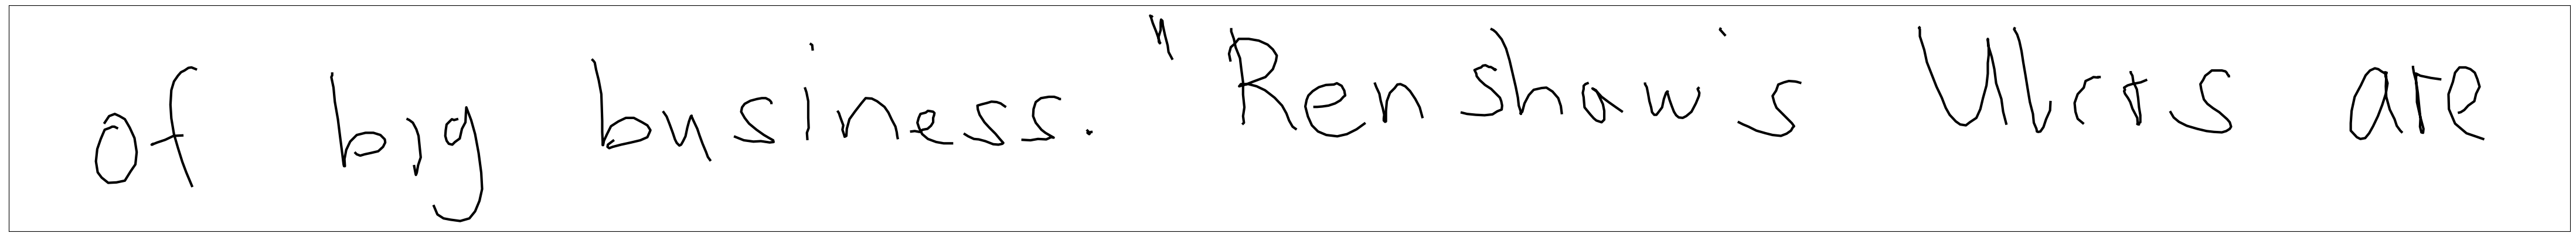

Dataset reference index: 8


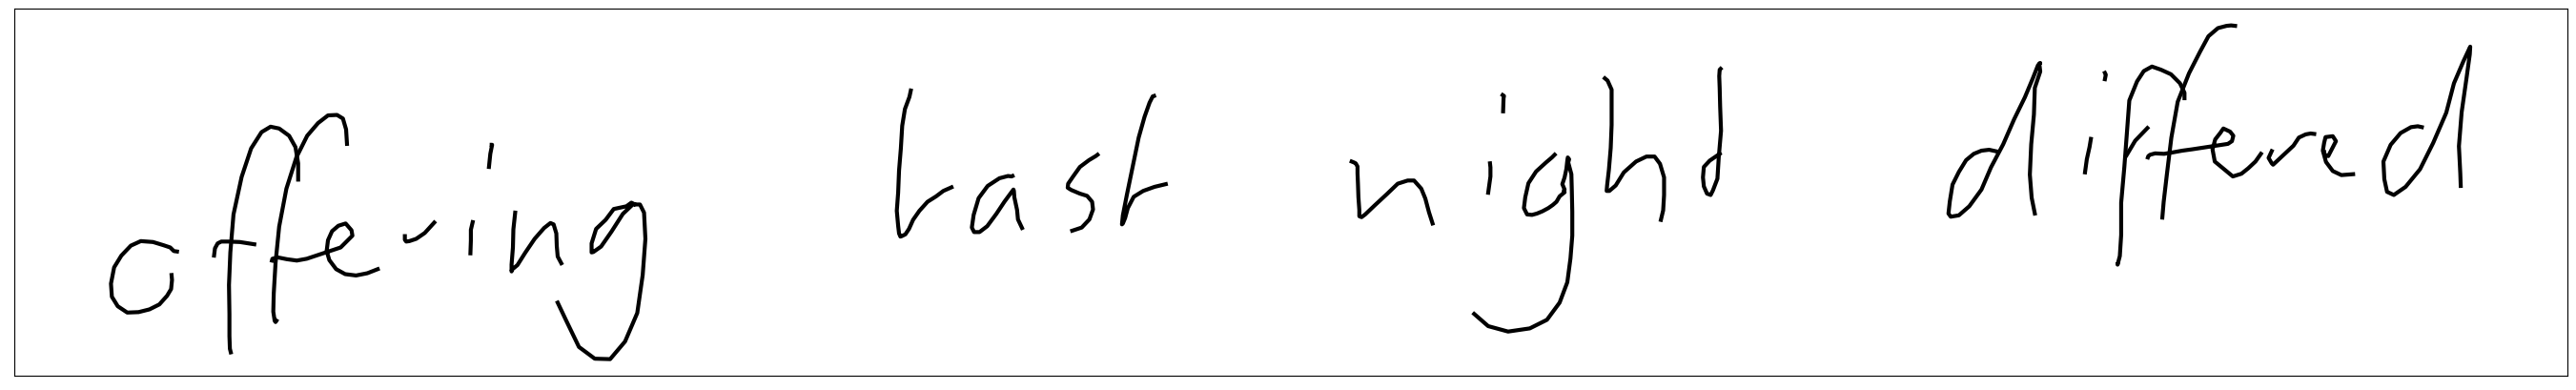

Dataset reference index: 9


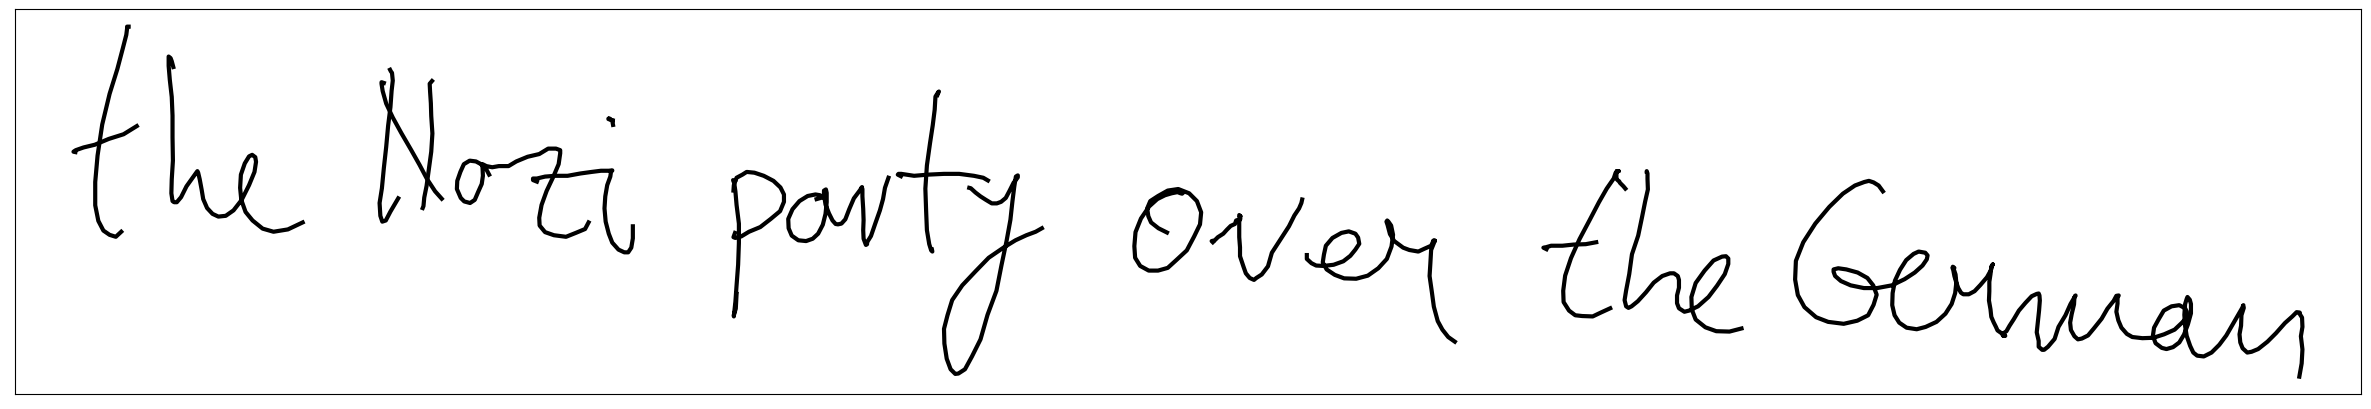

In [3]:
for ind in range(0,10):
    print("Dataset reference index:", ind)
    plot_stroke(strokes[ind])

# Conditional Generation

In [4]:
from utils.loading import load_pretrained_congen, load_pretrained_uncond
from utils.plots import plot_stroke

import utils.sampling

import importlib
importlib.reload(utils.sampling)

from utils.sampling import sample_congen, sample_uncond, sample_prime, sample_uncond_attn, sample_congen_attn

C:\Users\fabia_ja391df\miniconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] Não foi possível encontrar o procedimento especificado
  warn(f"Failed to load image Python extension: {e}")


C:\Users\fabia_ja391df\miniconda3\lib\site-packages\torch\nn\modules\rnn.py:67: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


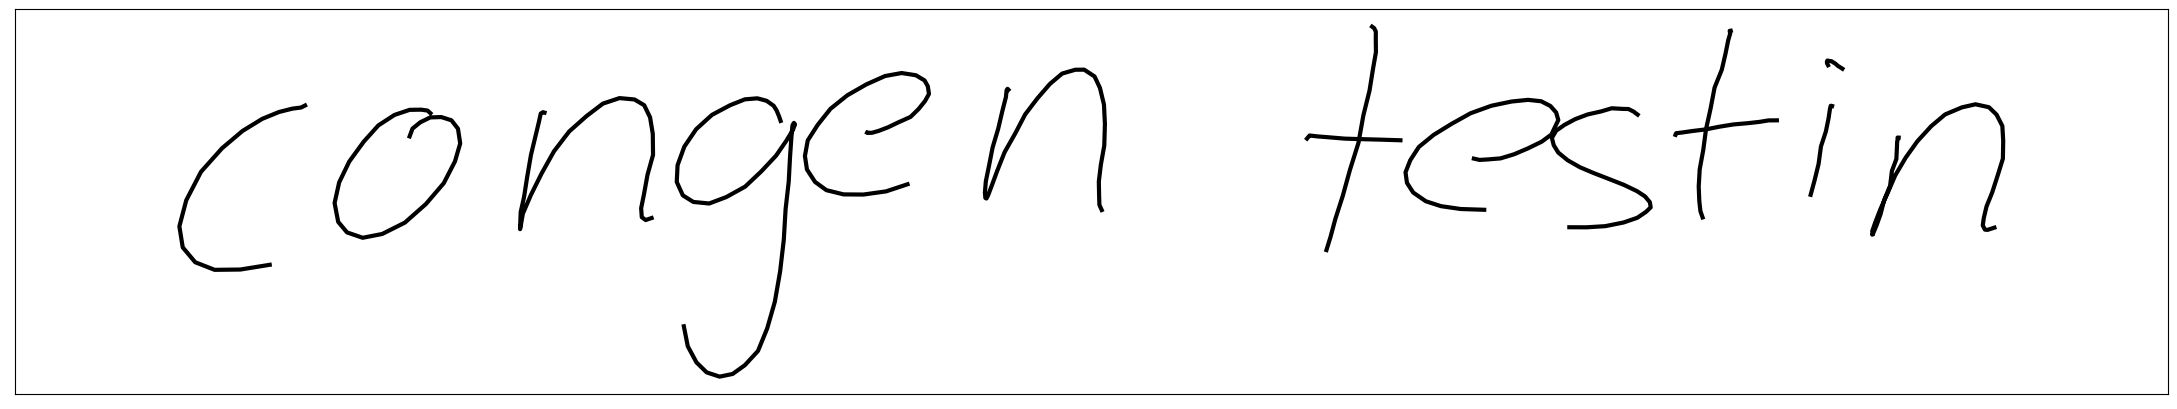

In [5]:
lr_model, char_to_vec, h_size = load_pretrained_congen(r"C:\Users\fabia_ja391df\Desktop\EA\seq2seq-handwritting-synthesis\checkpoints\cond49.ckpt")

strokes, mix_params, phi, wind = sample_congen(lr_model, 'congen testing', char_to_vec, h_size, bias1=1, bias2=1)
plot_stroke(strokes)

# Primed Sampling 

In [6]:
with open('./data/sentences.txt', 'r') as f:
    texts = f.readlines()
texts = [a.split('\n')[0] for a in texts]

## Experiment 1 - Target phrase style matching

Dataset reference index: 0


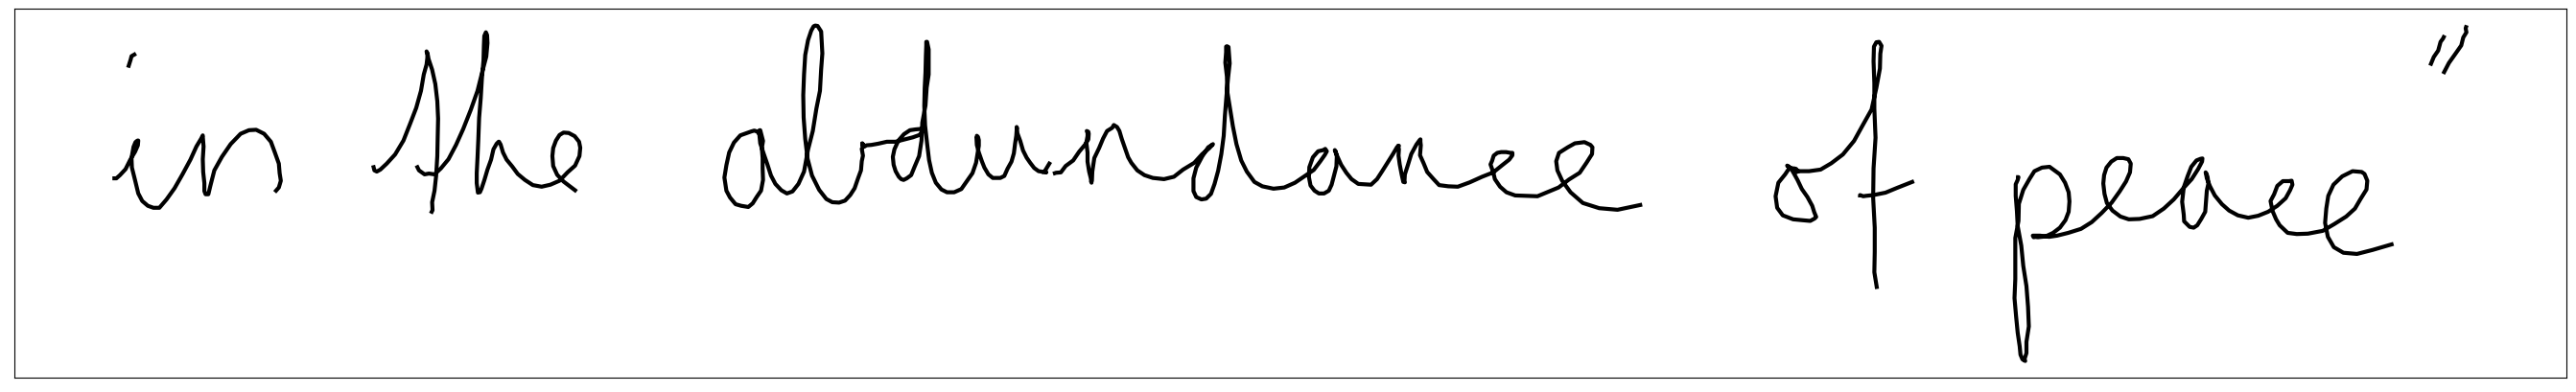

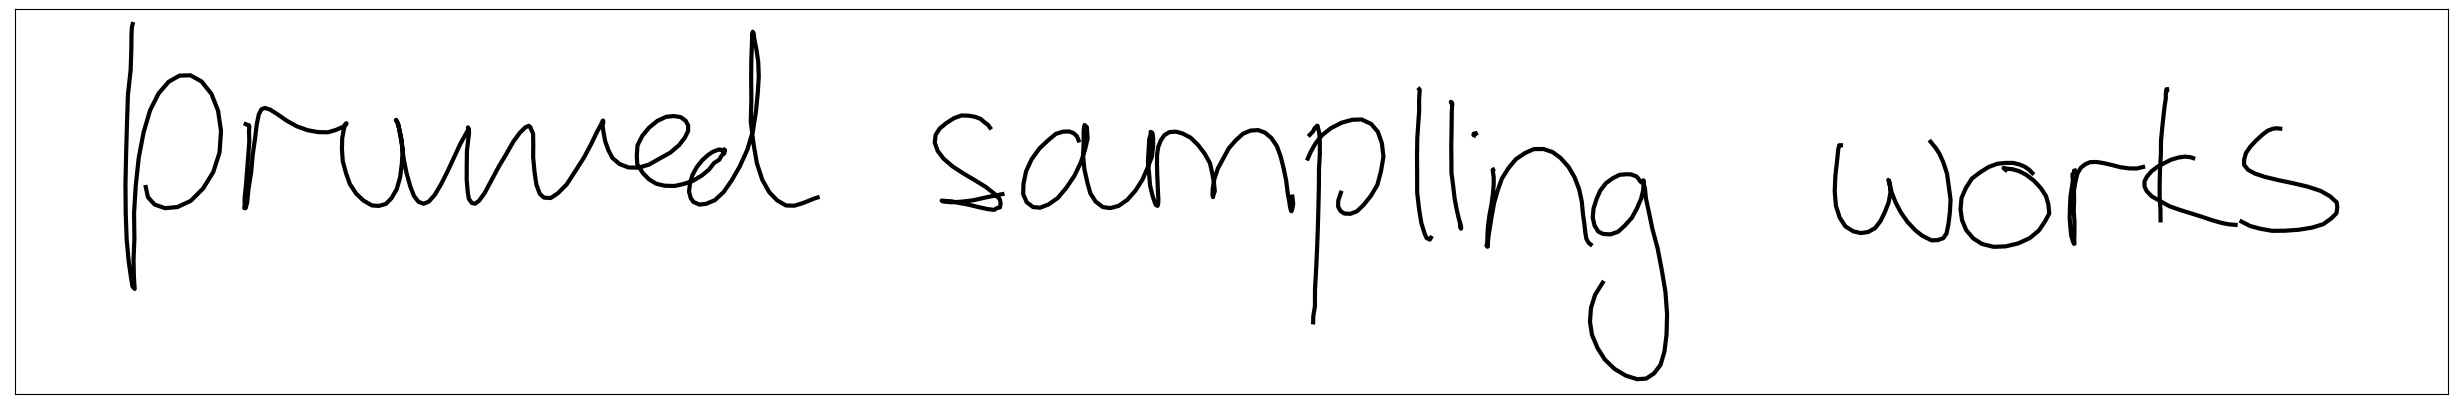

Dataset reference index: 1


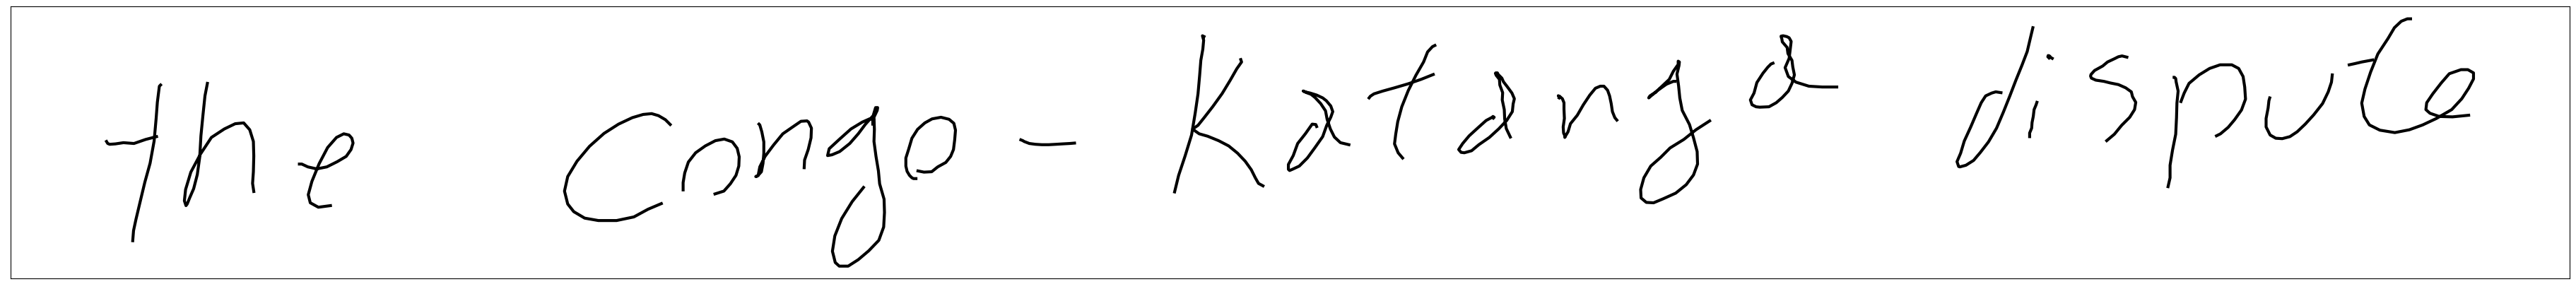

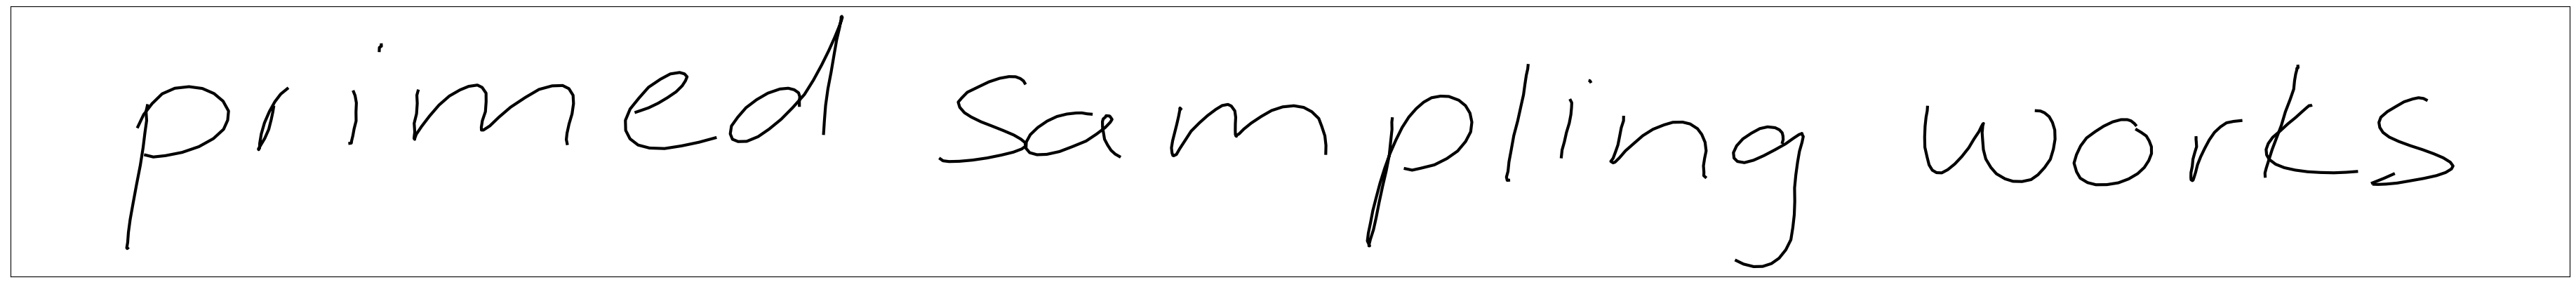

Dataset reference index: 2


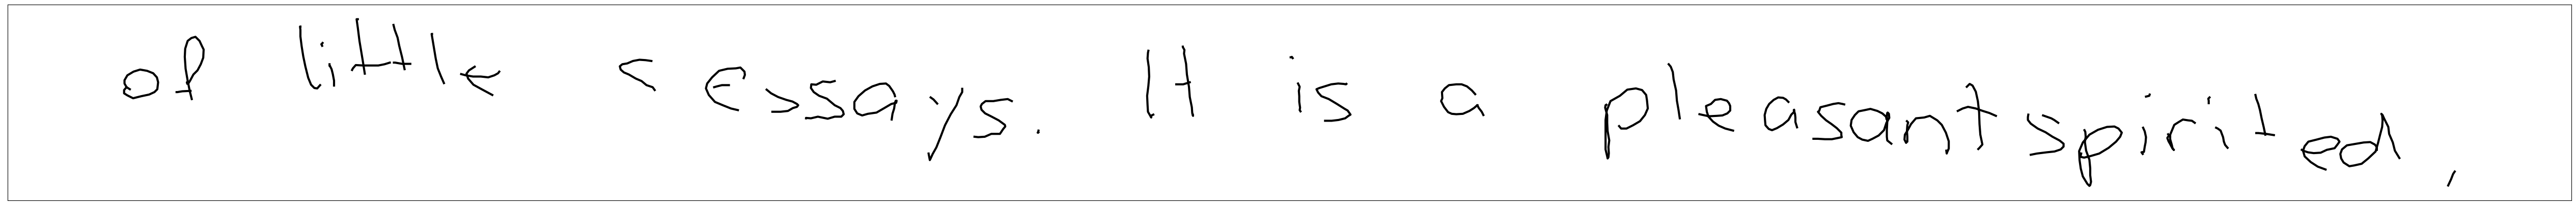

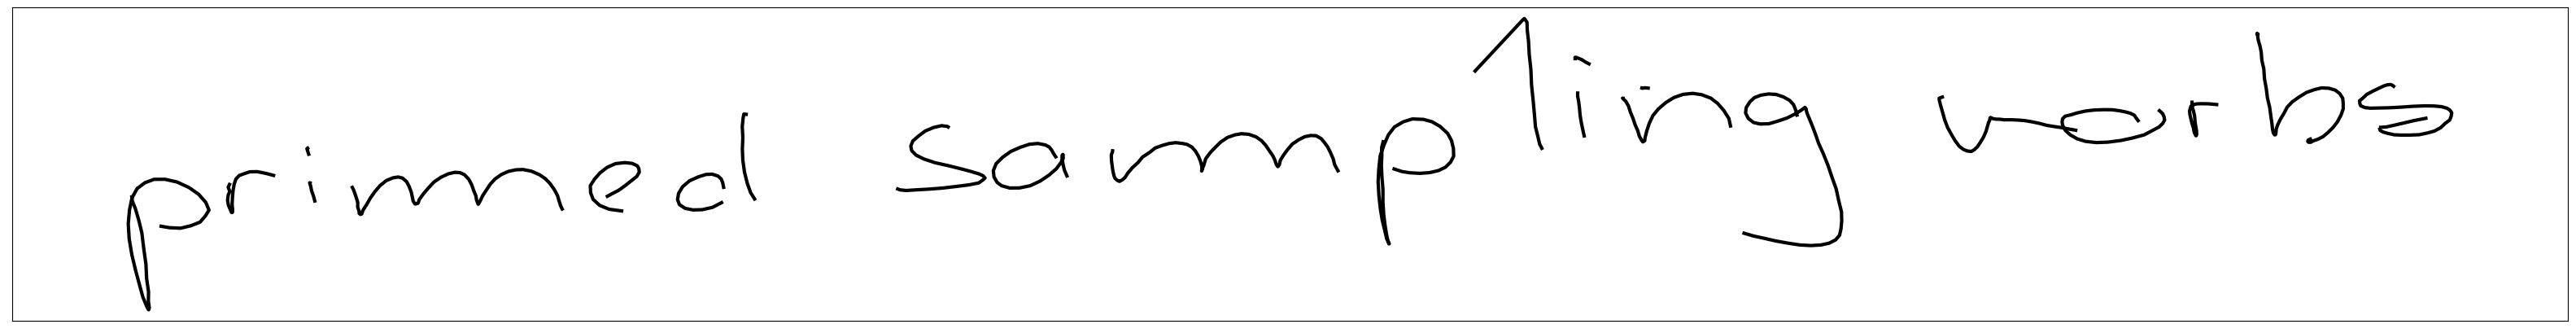

Dataset reference index: 3


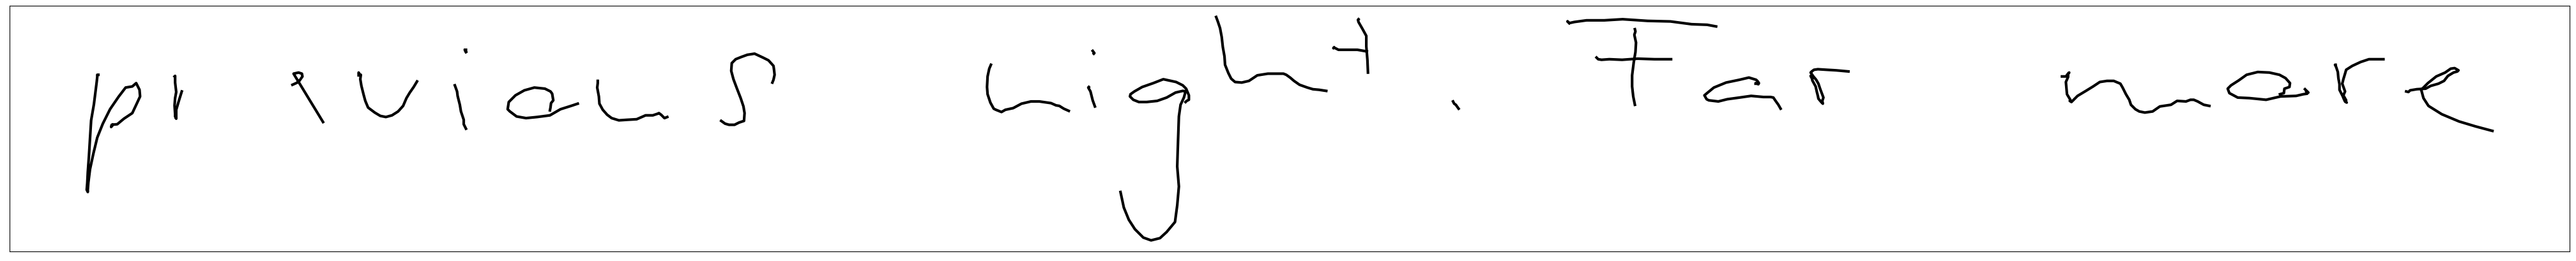

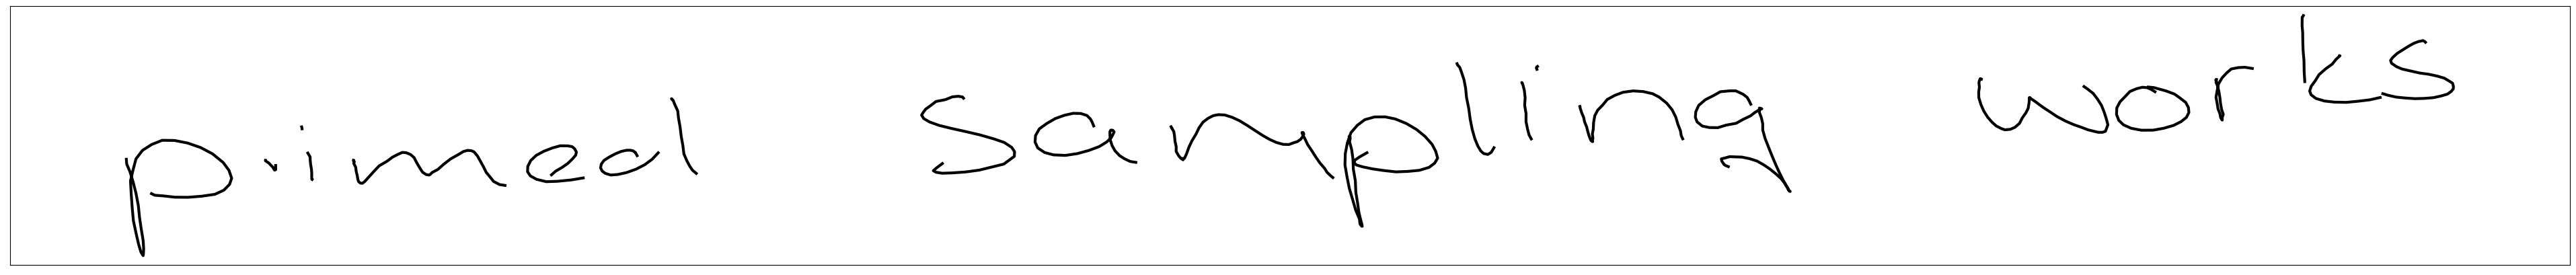

Dataset reference index: 4


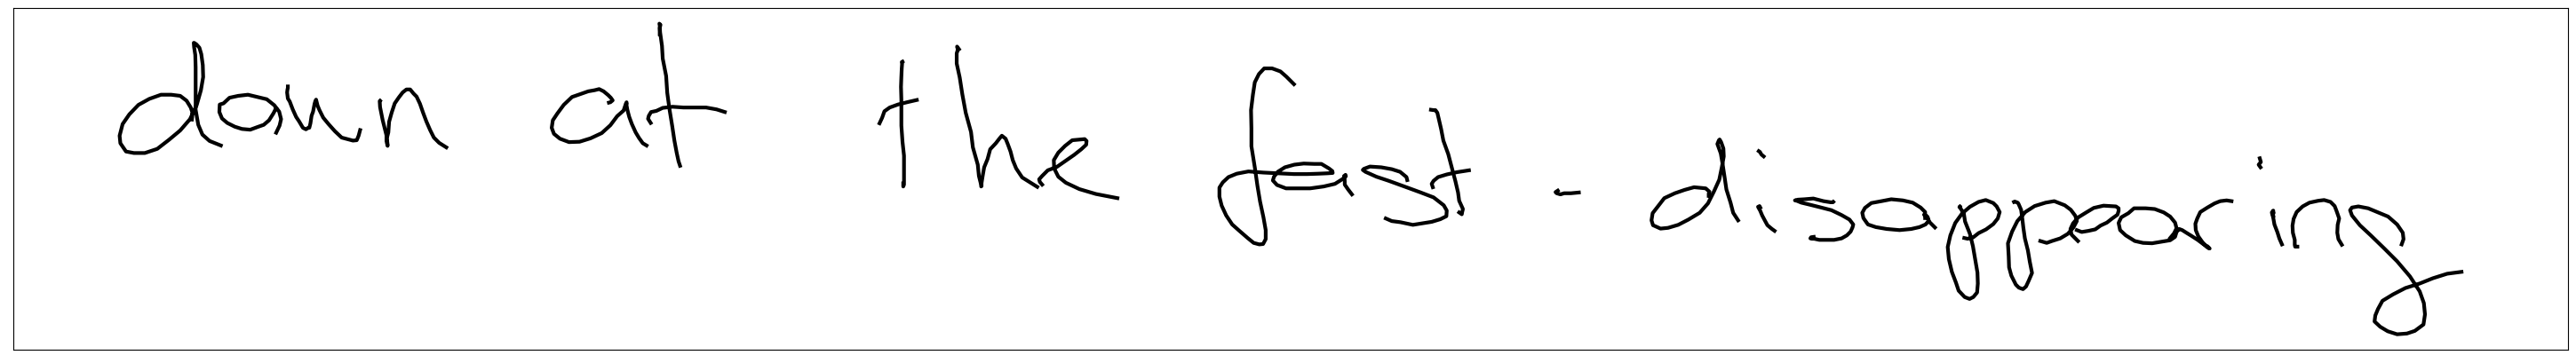

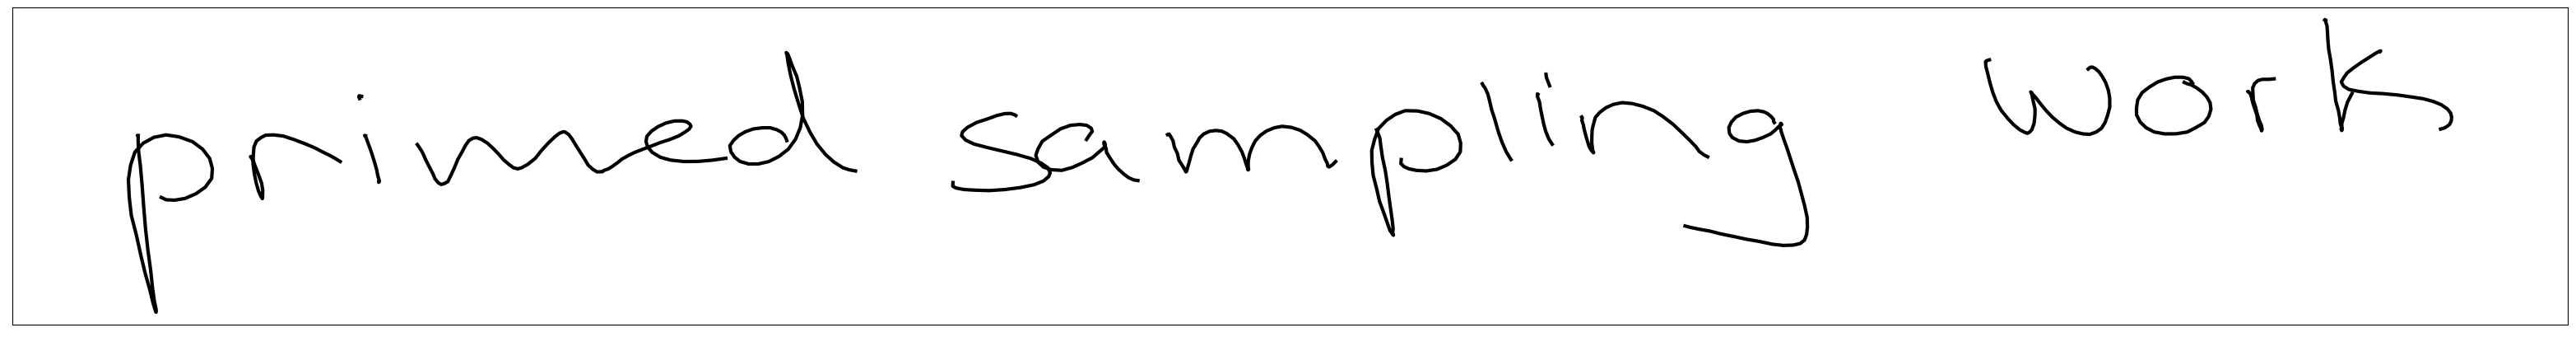

In [7]:
target_phrase = "primed sampling works"

for ind in range(5):
    print("Dataset reference index:", ind)
    strokes, mix_params, phi, wind, copy, upt = sample_prime(lr_model, target_phrase, ind, char_to_vec, h_size, bias1=0.2, bias2=0.9, time_step=5000, scale=50)
    plot_stroke(copy)
    plot_stroke(strokes)

> $\textbf{Commentary}$: We see that it does copy the style pretty well, if you increase the range of the for loop you can plot it for even more samples and start to notice some interesting patters. For one the model learns to differentiate between print and cursive writing (probably it is able to infer from the hidden states if it should do eos jumps at the end of each letter window for print vs. only at the end of each word window for cursive), the model is also able to catch particularities in the way certain letters are written (letters e and a are good examples).

## Experiment 2 - Effect of bias

Dataset reference index: 66


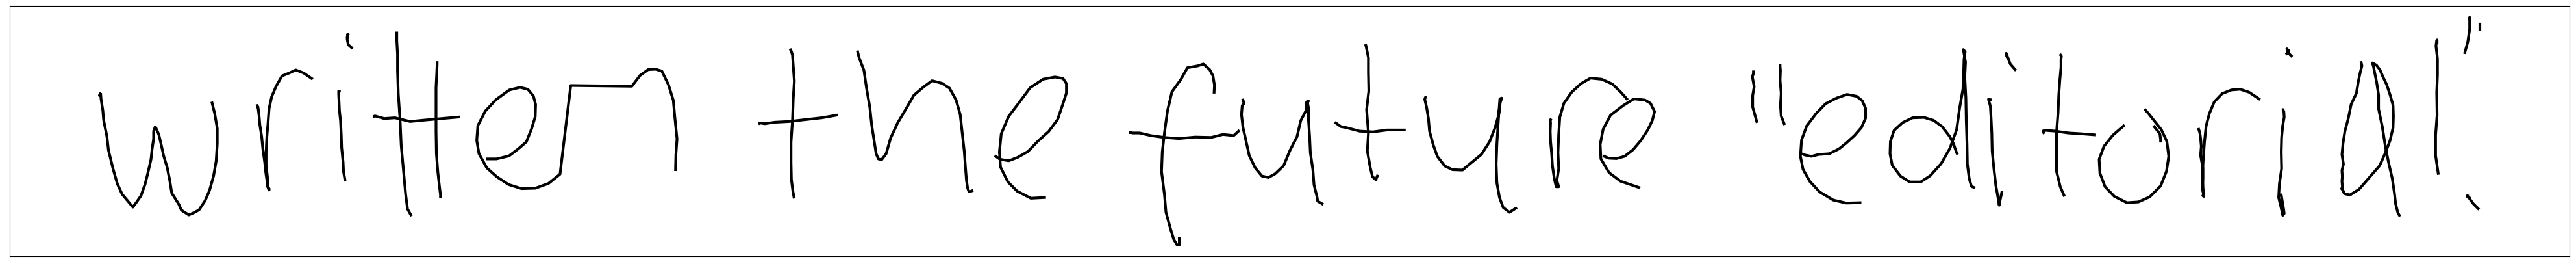

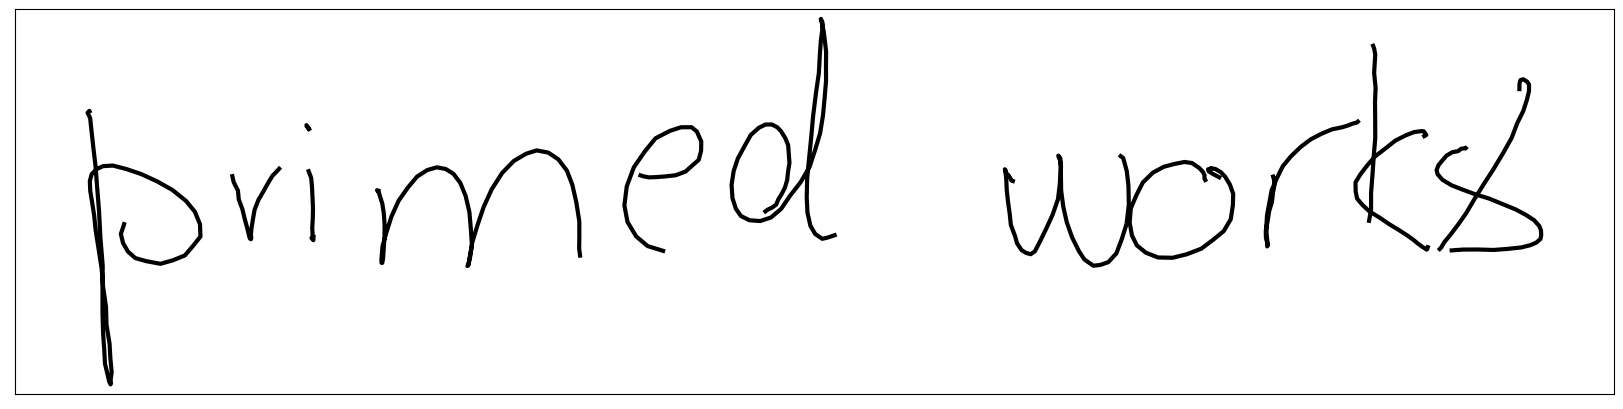

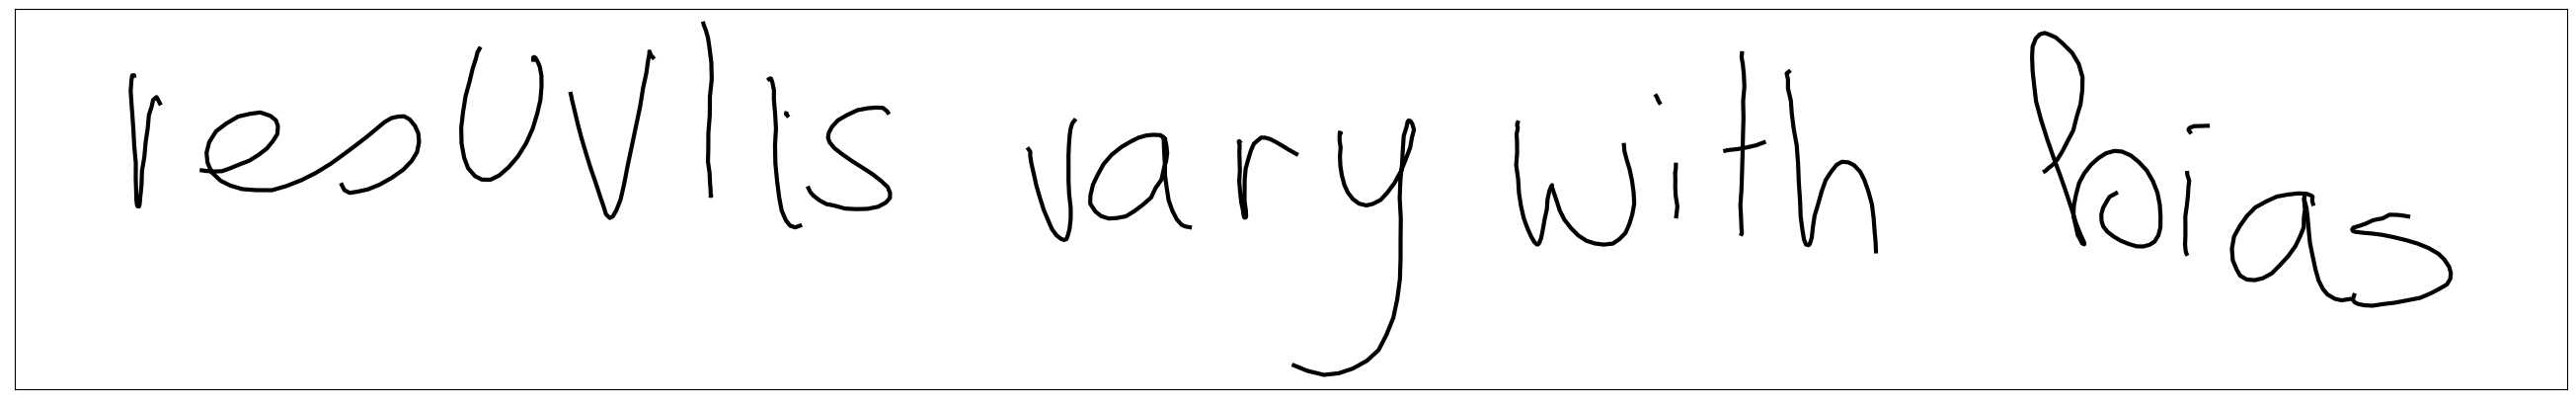

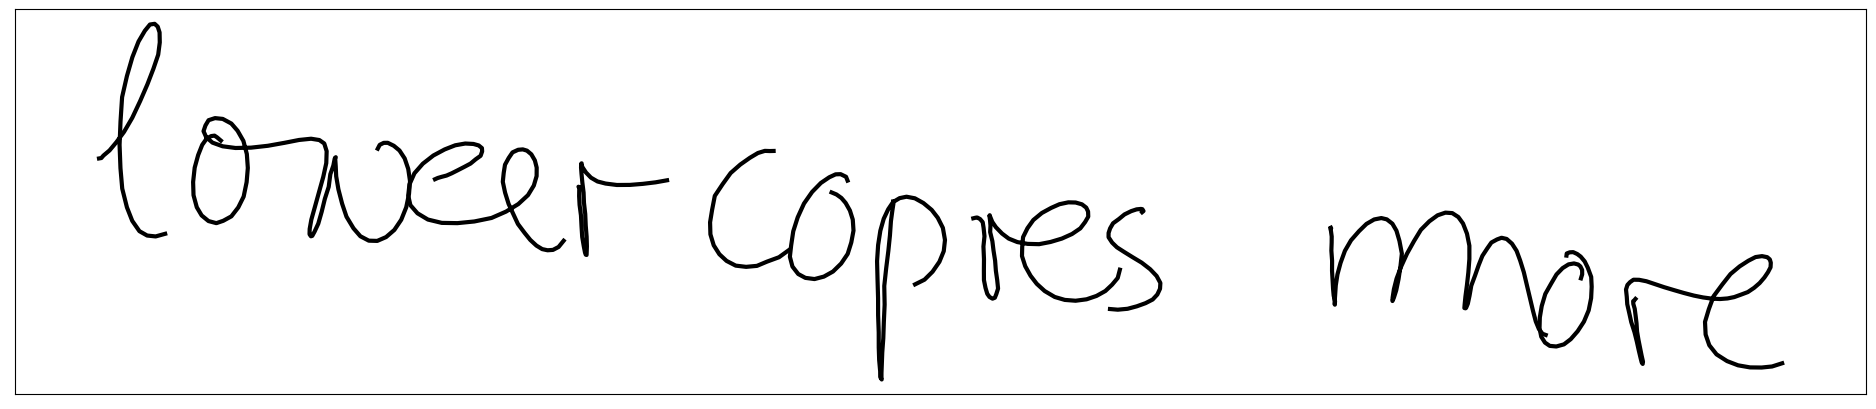

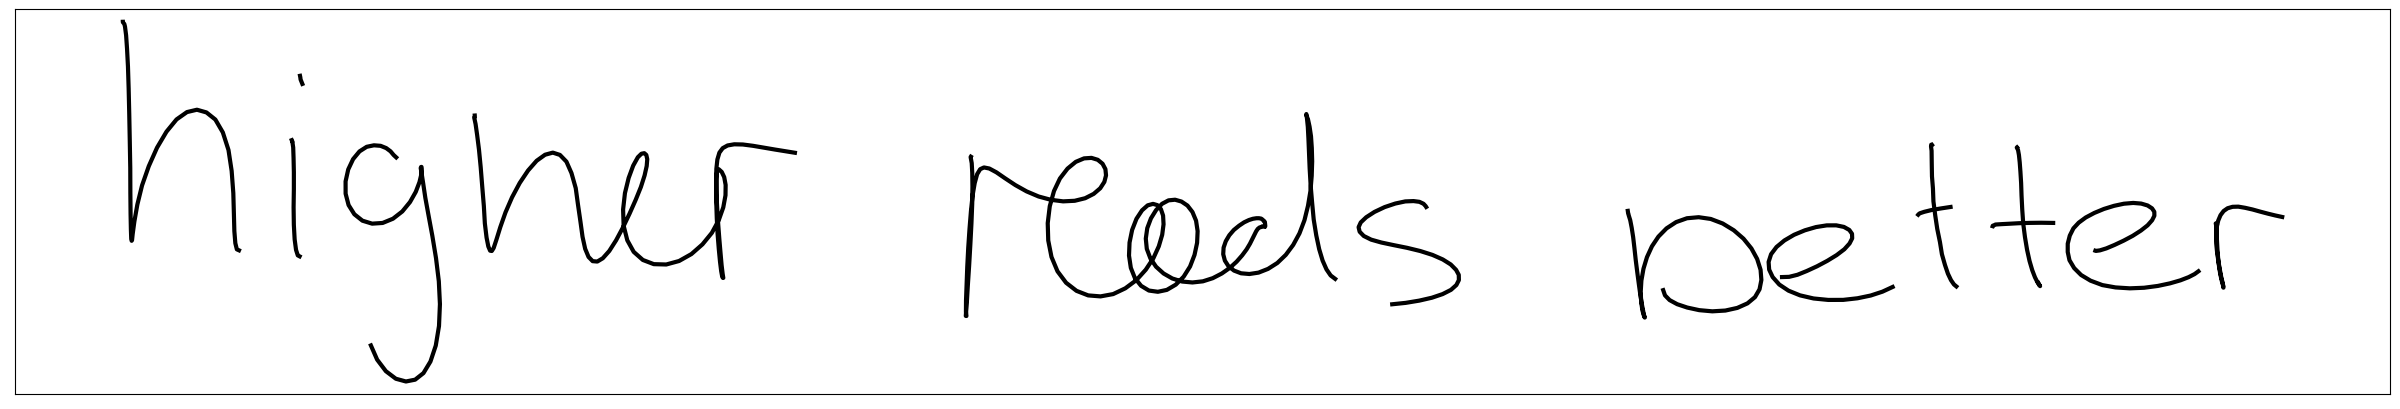

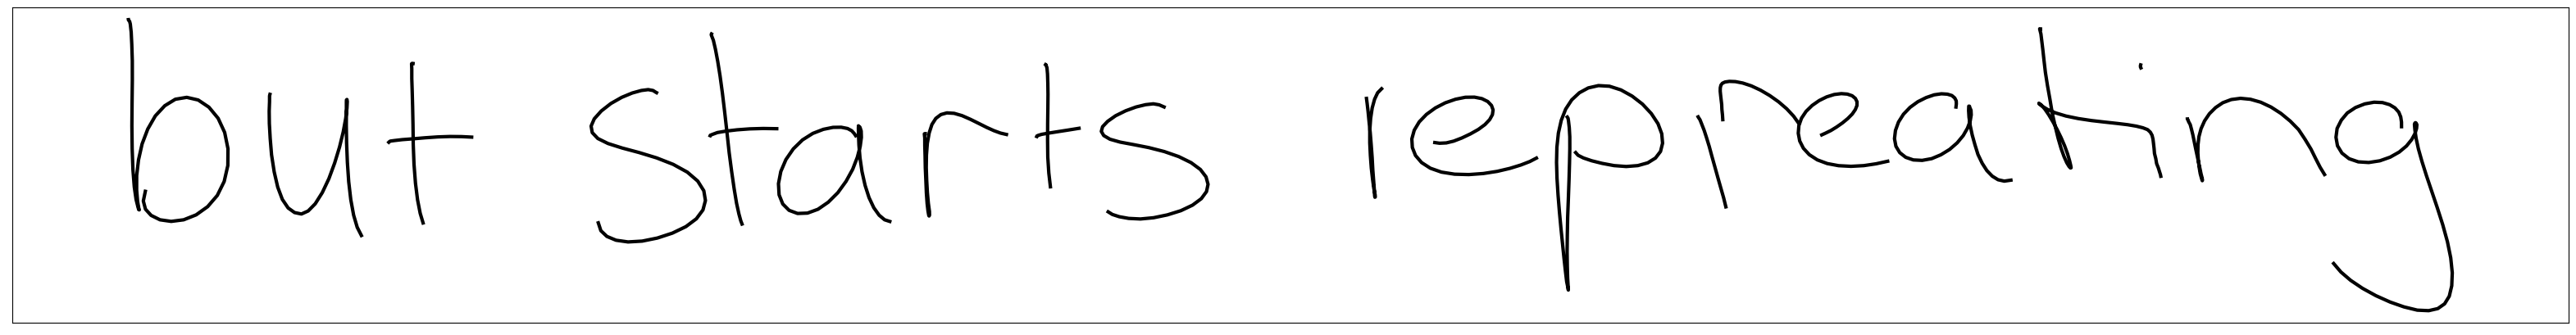

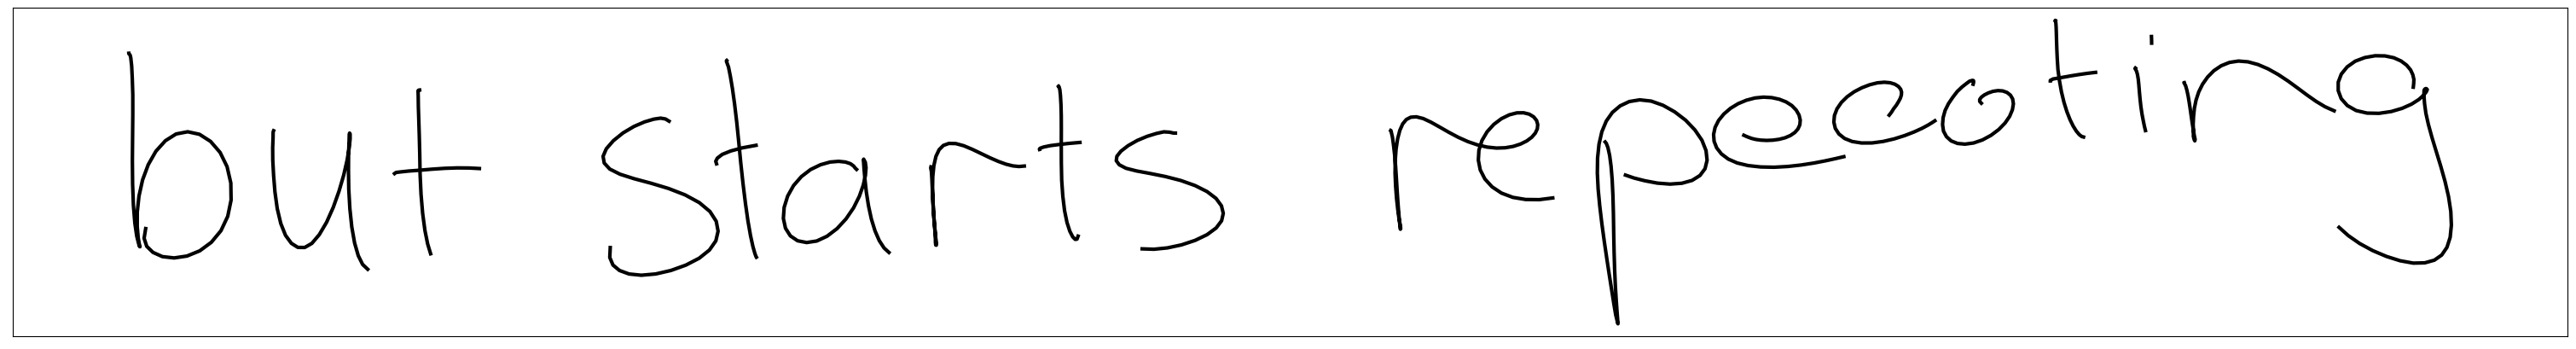

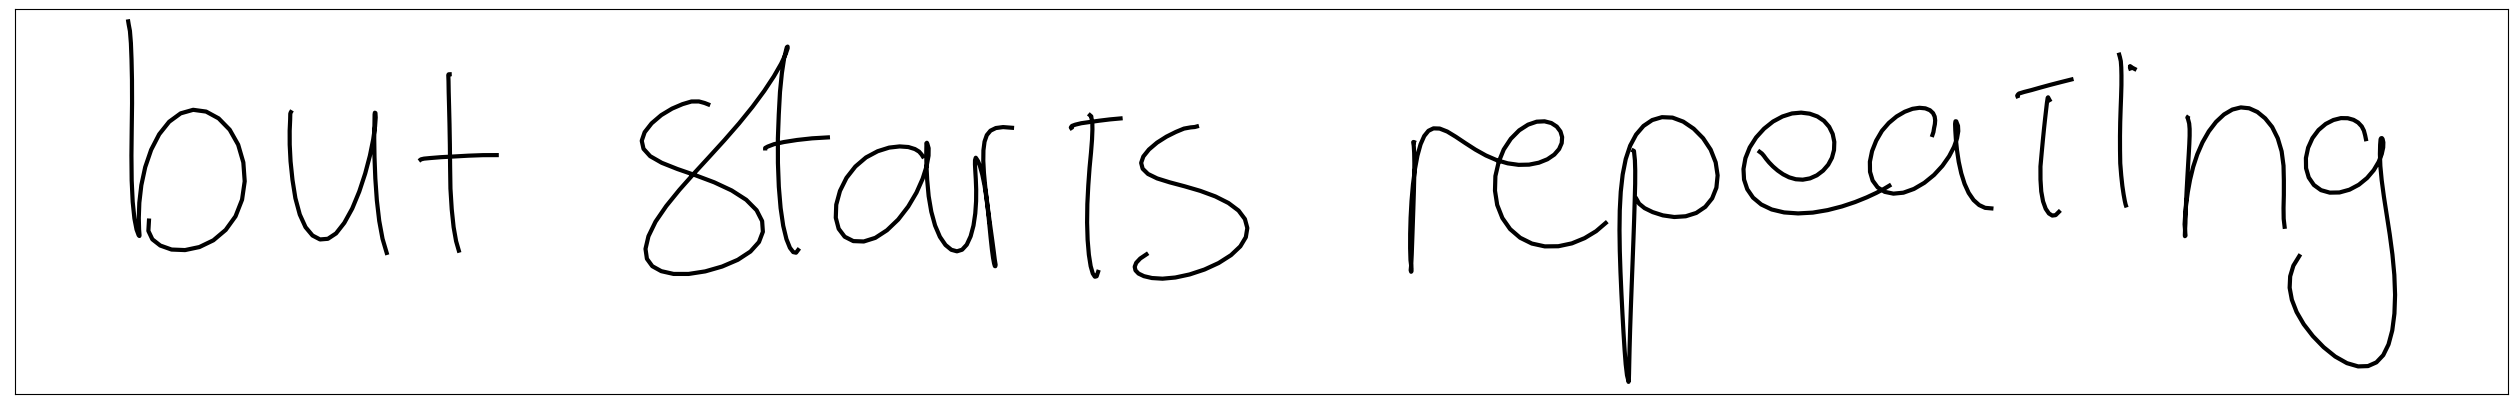

In [8]:
#You can test other indexes, note that because of the non-trivial stopping condition they may be cut short abruptly or go on for too long, plotting non-sensical lines after it ends, especially for low bias.
ind = 66

print("Dataset reference index:", ind)
strokes, mix_params, phi, wind, copy, upt = sample_prime(lr_model, 'primed works', ind, char_to_vec, h_size, bias1=0.2, bias2=0.2, time_step=2000, scale=100)
plot_stroke(copy)
plot_stroke(strokes)

strokes, mix_params, phi, wind, copy, upt = sample_prime(lr_model, 'results vary with bias', ind, char_to_vec, h_size, bias1=0.4, bias2=0.4, time_step=2000, scale=100)
plot_stroke(strokes)

strokes, mix_params, phi, wind, copy, upt = sample_prime(lr_model, 'lower copies more', ind, char_to_vec, h_size, bias1=0.5, bias2=0.5, time_step=2000, scale=100)
plot_stroke(strokes)

strokes, mix_params, phi, wind, copy, upt = sample_prime(lr_model, 'higher reads better', ind, char_to_vec, h_size, bias1=1.5, bias2=3, time_step=2000, scale=100)
plot_stroke(strokes)

strokes, mix_params, phi, wind, copy, upt = sample_prime(lr_model, 'but starts repeating', ind, char_to_vec, h_size, bias1=3, bias2=3, time_step=2000, scale=100)
plot_stroke(strokes)

strokes, mix_params, phi, wind, copy, upt = sample_prime(lr_model, 'but starts repeating', ind, char_to_vec, h_size, bias1=4, bias2=4, time_step=2000, scale=100)
plot_stroke(strokes)

strokes, mix_params, phi, wind, copy, upt = sample_prime(lr_model, 'but starts repeating', ind, char_to_vec, h_size, bias1=5, bias2=8, time_step=2000, scale=100)
plot_stroke(strokes)

> $\textbf{Commentary}$: We see that lower bias decreases output probability, thus is becomes harder to read, but it allows the sampling process to keep the original distribution of stokes it would like to output from the hidden states, whereas with high bias we modify it towards a more universal stroke style (that of vanilla conditional generation).

## Experiment 3 - Exact Phrase Matching

Dataset reference index: 0


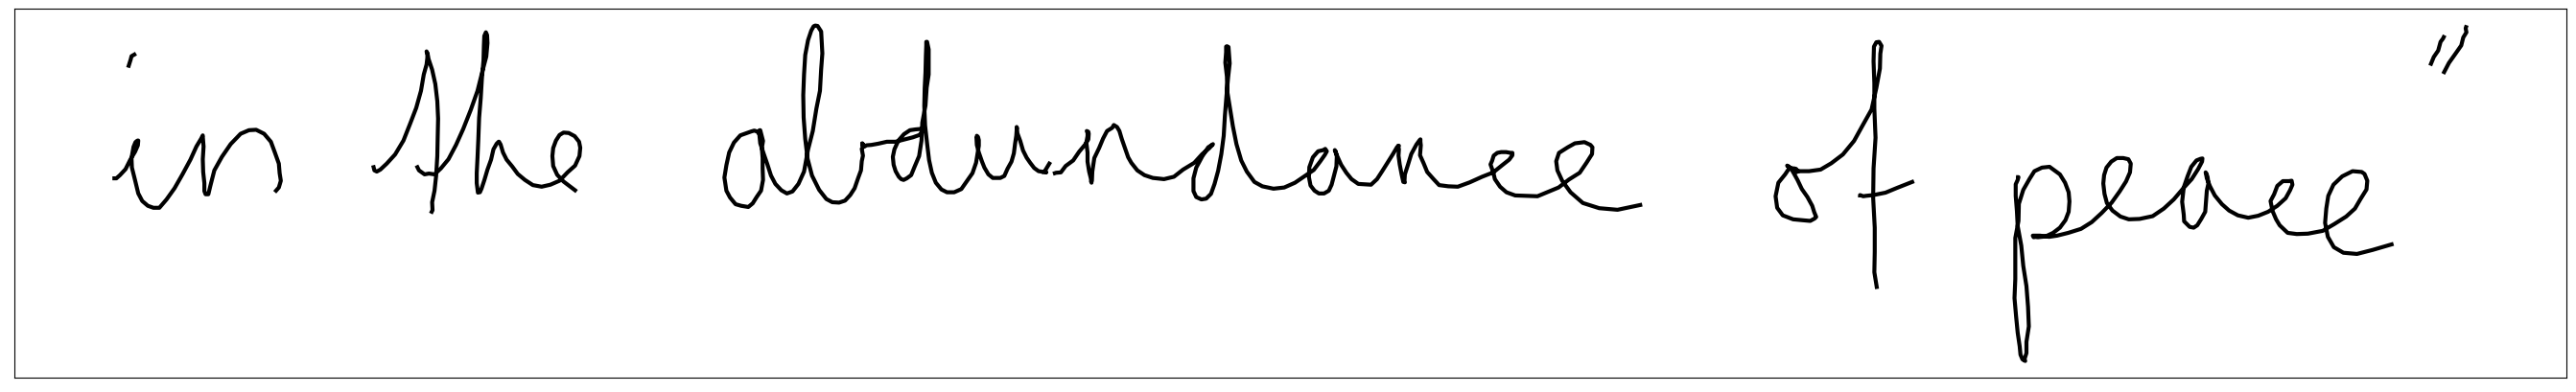

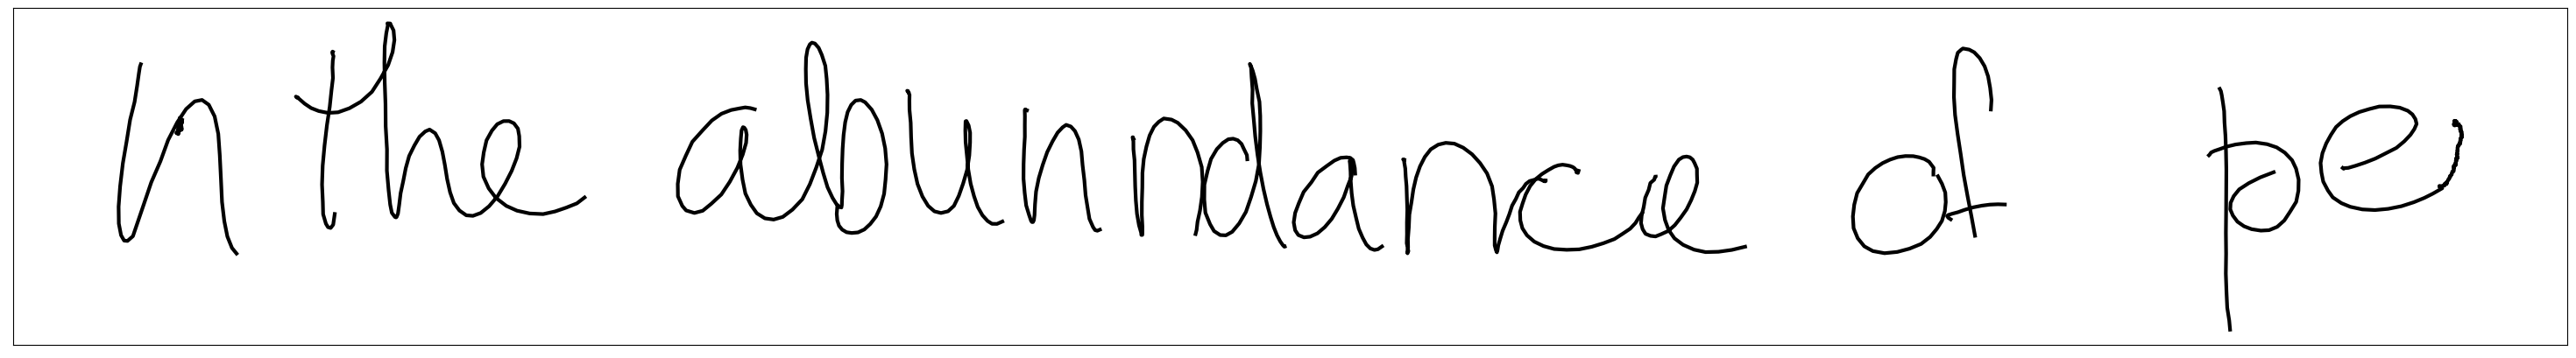

Dataset reference index: 1


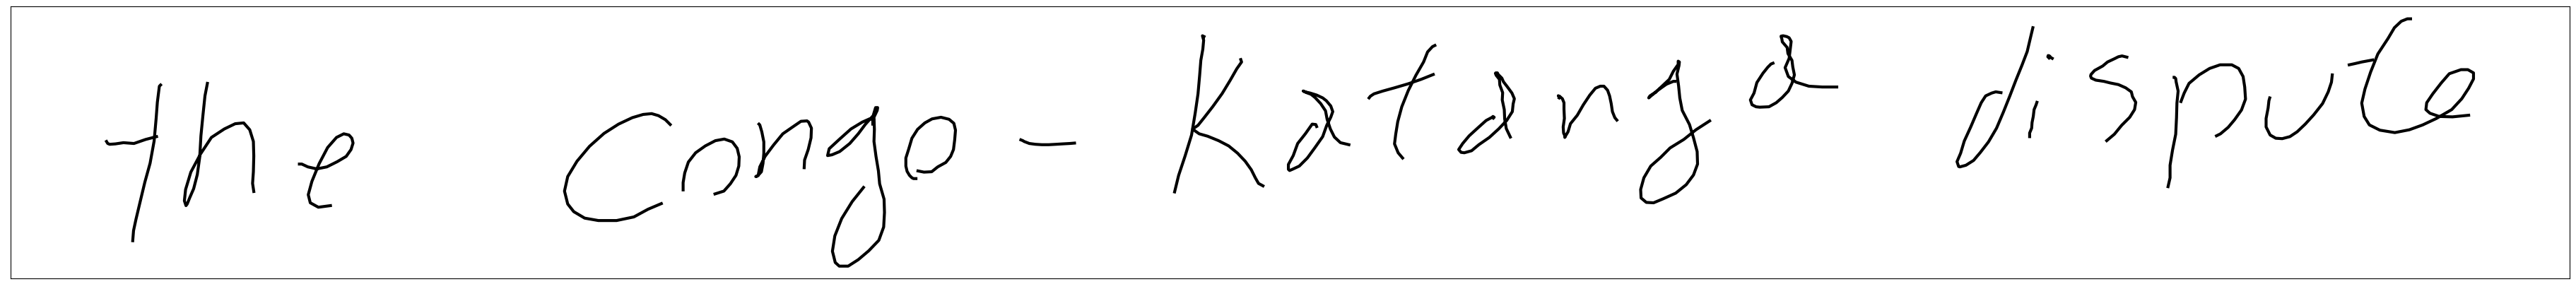

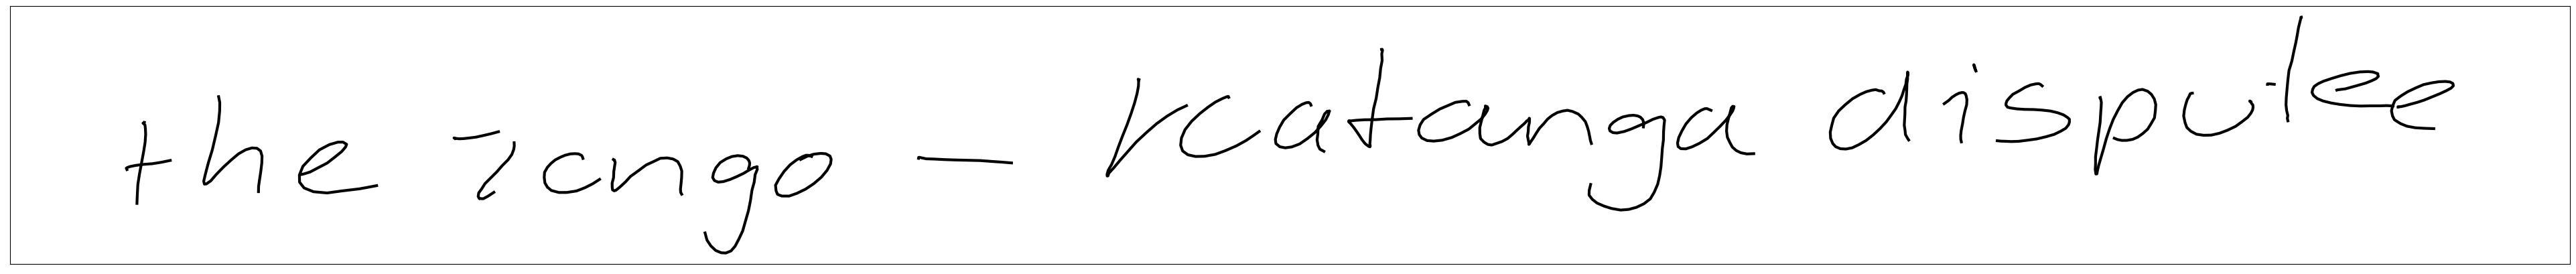

Dataset reference index: 2


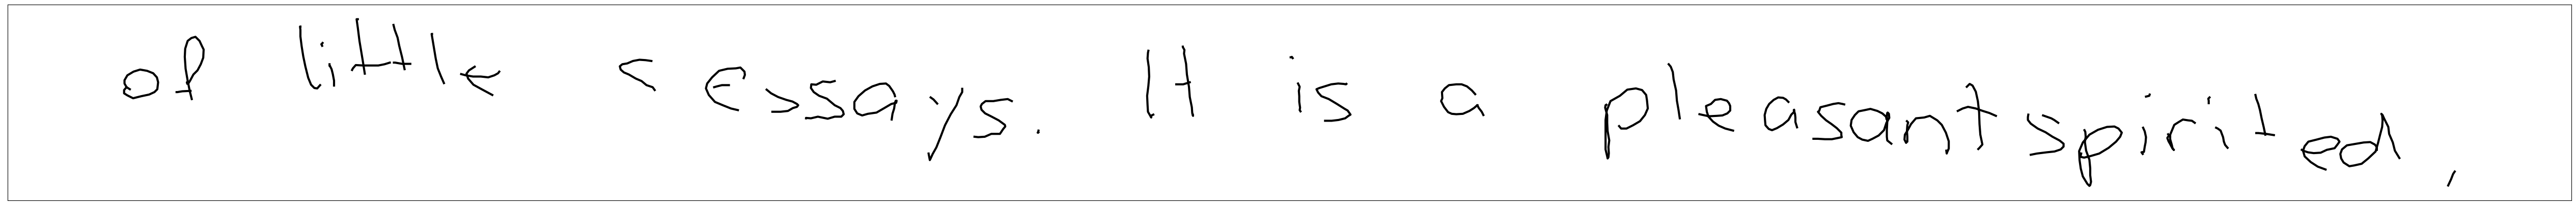

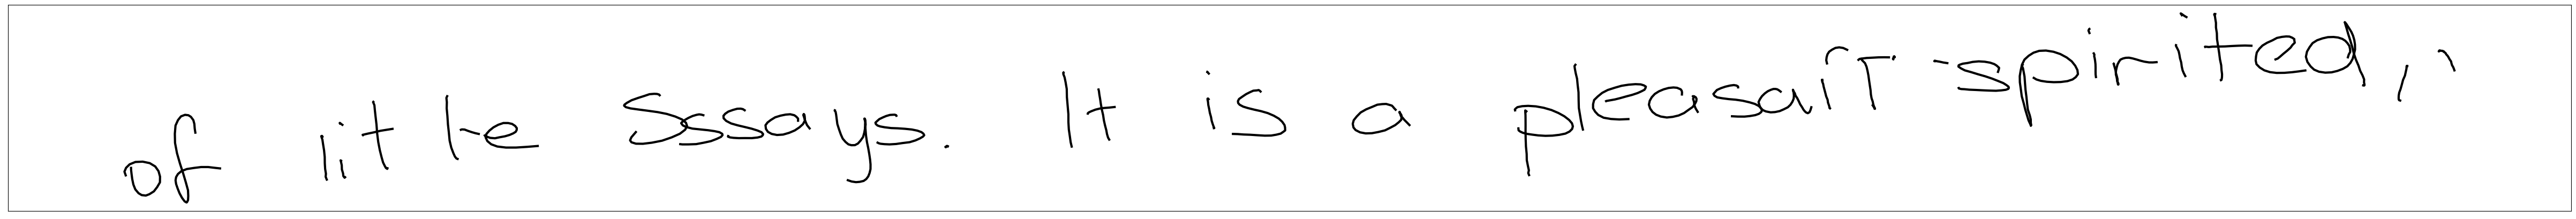

Dataset reference index: 3


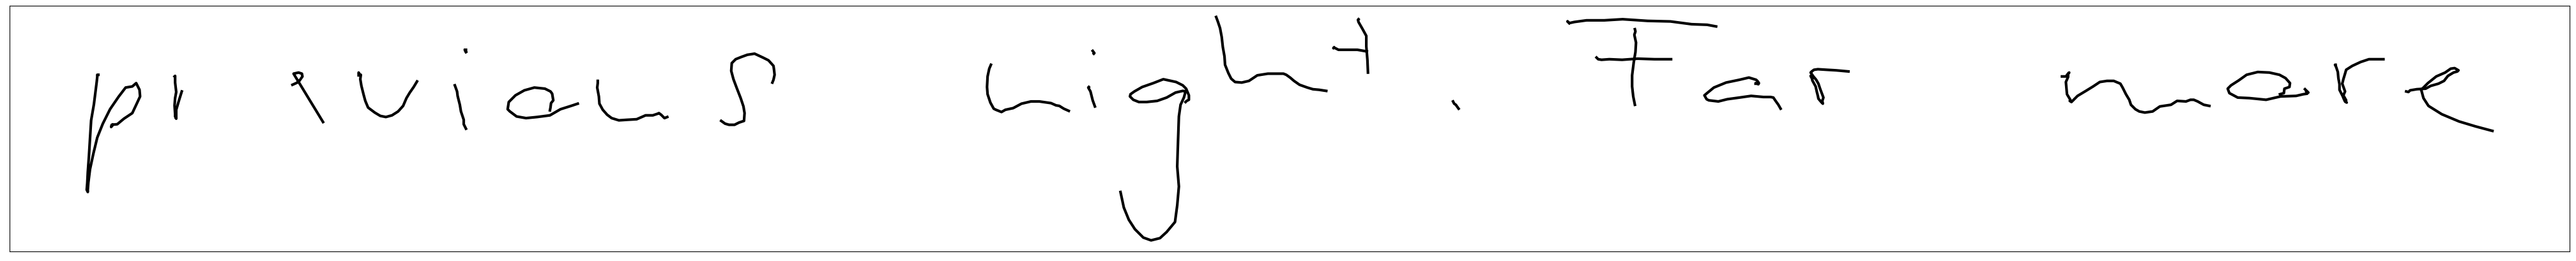

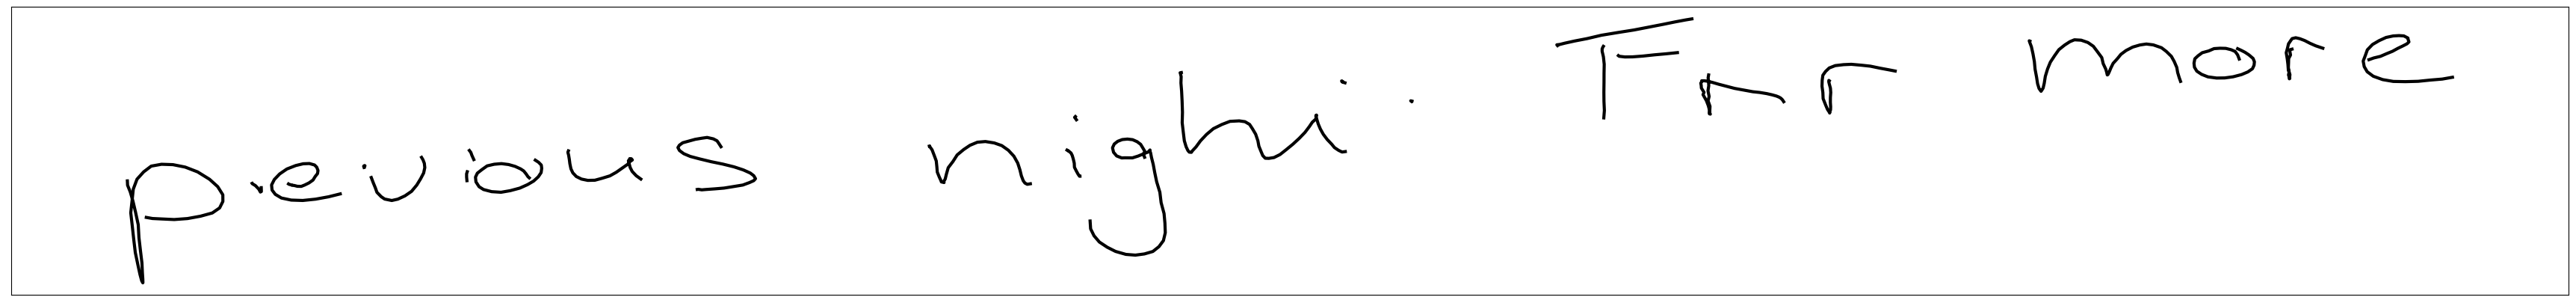

Dataset reference index: 4


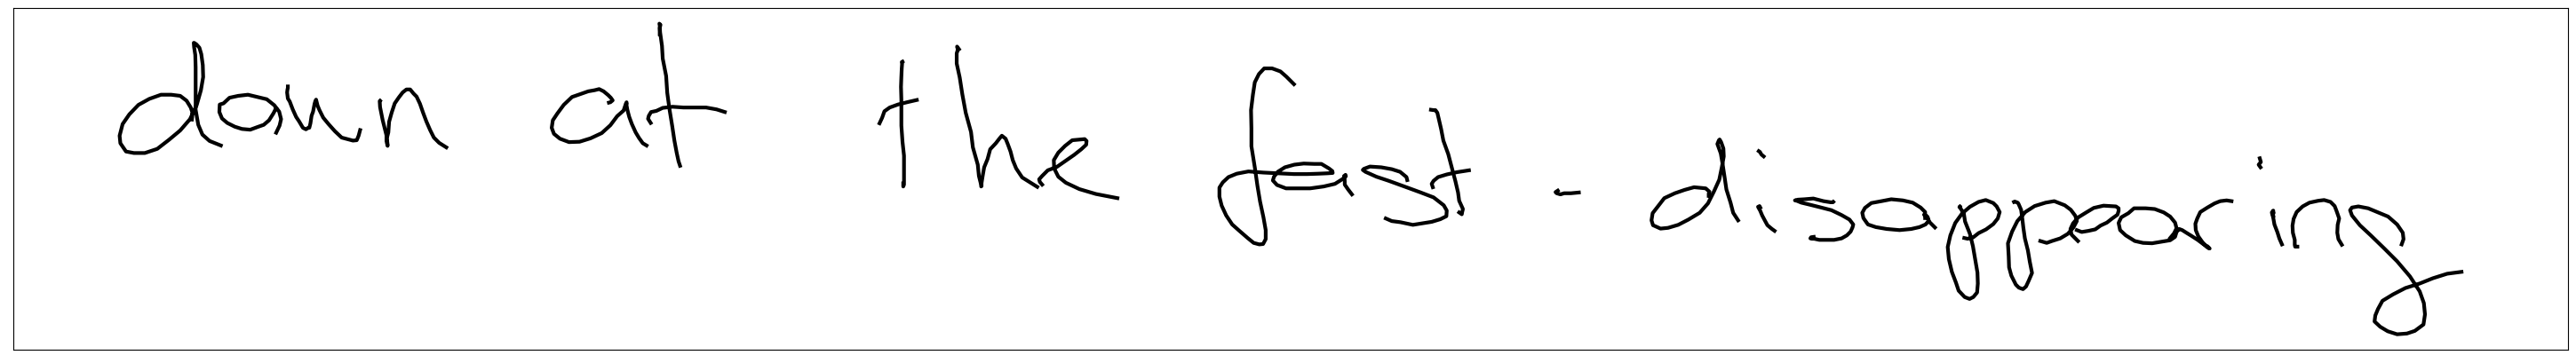

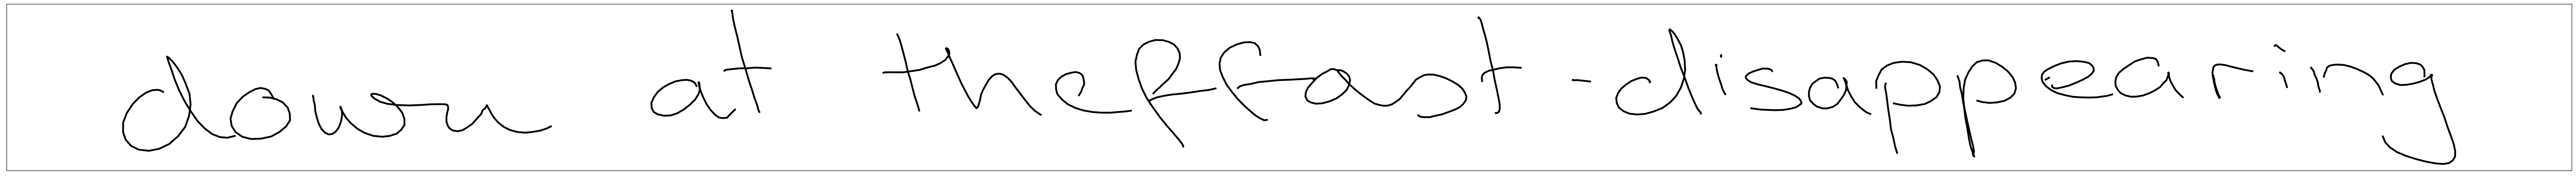

In [9]:
for ind in range(5):
    print("Dataset reference index:", ind)
    strokes, mix_params, phi, wind, copy, upt = sample_prime(lr_model, texts[ind], ind, char_to_vec, h_size, bias1=0.2, bias2=0.9, time_step=5000, scale=50)
    plot_stroke(copy)
    plot_stroke(strokes)

> $\textbf{Commentary}$: It also seems to match well most phrases, this experiment however is the one that suffers most from both shortcomings discussed in the oral presentation: It sometimes randomly repeats letters (or even entire words in the beginning) and it can also have trouble stopping correcly, getting the window to the end too soon and thus not finishing all stokes, or letting it go too far and starting to sample nonsensical strokes. You can look for both of these problems by increasing the range on the for loop.